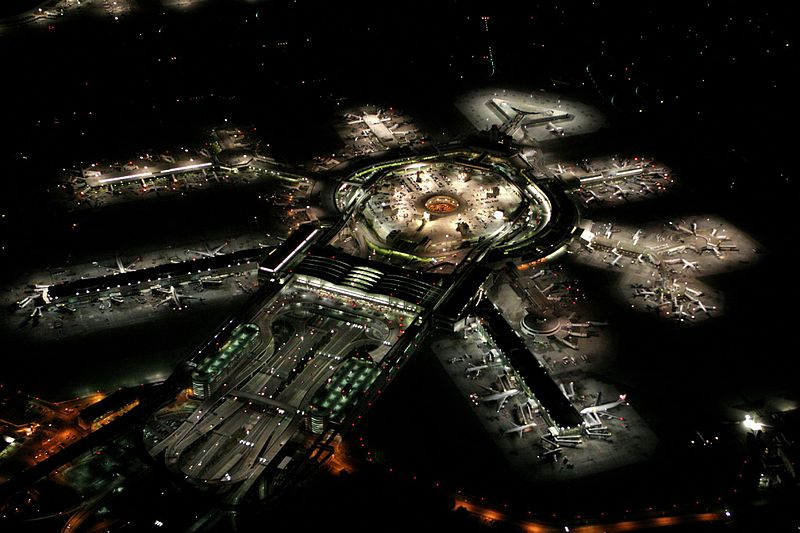

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
pd.set_option('display.max_columns',100)
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [2]:
def cluster(x,clusters):
    
    x=x
    allscore = []
    allclusters = []
    sum_of_squared_distances = []
    
    for i in np.arange(1,clusters):
        
        i+=1
        model=KMeans(n_clusters=i)
        pred=model.fit_predict(x)
        s_score=silhouette_score(x,pred)
        print('Number of cluster: {} , Score: {}'.format(i,s_score))
        allscore.append(s_score)
        allclusters.append(i)
        sum_of_squared_distances.append(model.inertia_)
        
    plt.figure(figsize=(10,10))
    plt.plot(allclusters,sum_of_squared_distances,marker='x',c='r');
    

In [3]:
df=pd.read_csv('air-traffic-passenger-statistics.csv')

In [4]:
df.sample(10)

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
9866,201207,Virgin America,VX,Virgin America,VX,Domestic,US,Deplaned,Low Fare,Terminal 2,D,172826
18661,201805,SkyWest Airlines,OO,Alaska Airlines,AS,Domestic,US,Enplaned,Other,Terminal 2,D,3902
15226,201605,Swiss International,LX,Swiss International,LX,International,Europe,Enplaned,Other,International,G,6277
18430,201804,Asiana Airlines,OZ,Asiana Airlines,OZ,International,Asia,Enplaned,Other,International,A,6686
9743,201206,United Airlines - Pre 07/01/2013,UA,United Airlines - Pre 07/01/2013,UA,International,Europe,Deplaned,Other,International,G,31420
7017,201007,Emirates,EK,Emirates,EK,International,Middle East,Deplaned,Other,International,G,9947
14691,201601,Japan Airlines,JL,Japan Airlines,JL,International,Asia,Deplaned,Other,International,A,6969
15419,201607,Air Pacific Limited dba Fiji Airways,FJ,Air Pacific Limited dba Fiji Airways,FJ,International,Australia / Oceania,Deplaned,Other,International,G,2743
8950,201111,United Airlines - Pre 07/01/2013,UA,United Airlines - Pre 07/01/2013,UA,International,Mexico,Enplaned,Other,International,G,11700
3868,200804,ExpressJet Airlines,XE,Delta Air Lines,DL,Domestic,US,Enplaned,Other,Terminal 1,C,5462


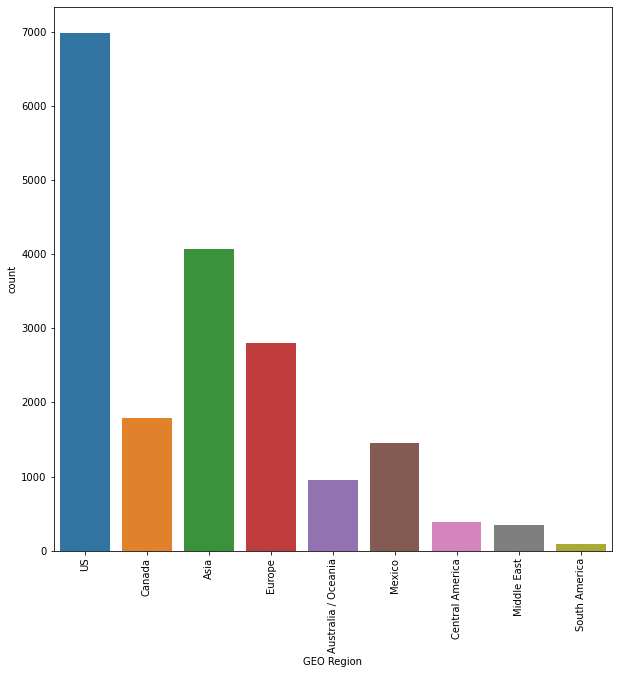

In [5]:
plt.figure(figsize=(10,10))
sns.countplot(df['GEO Region'])
plt.xticks(rotation=90);

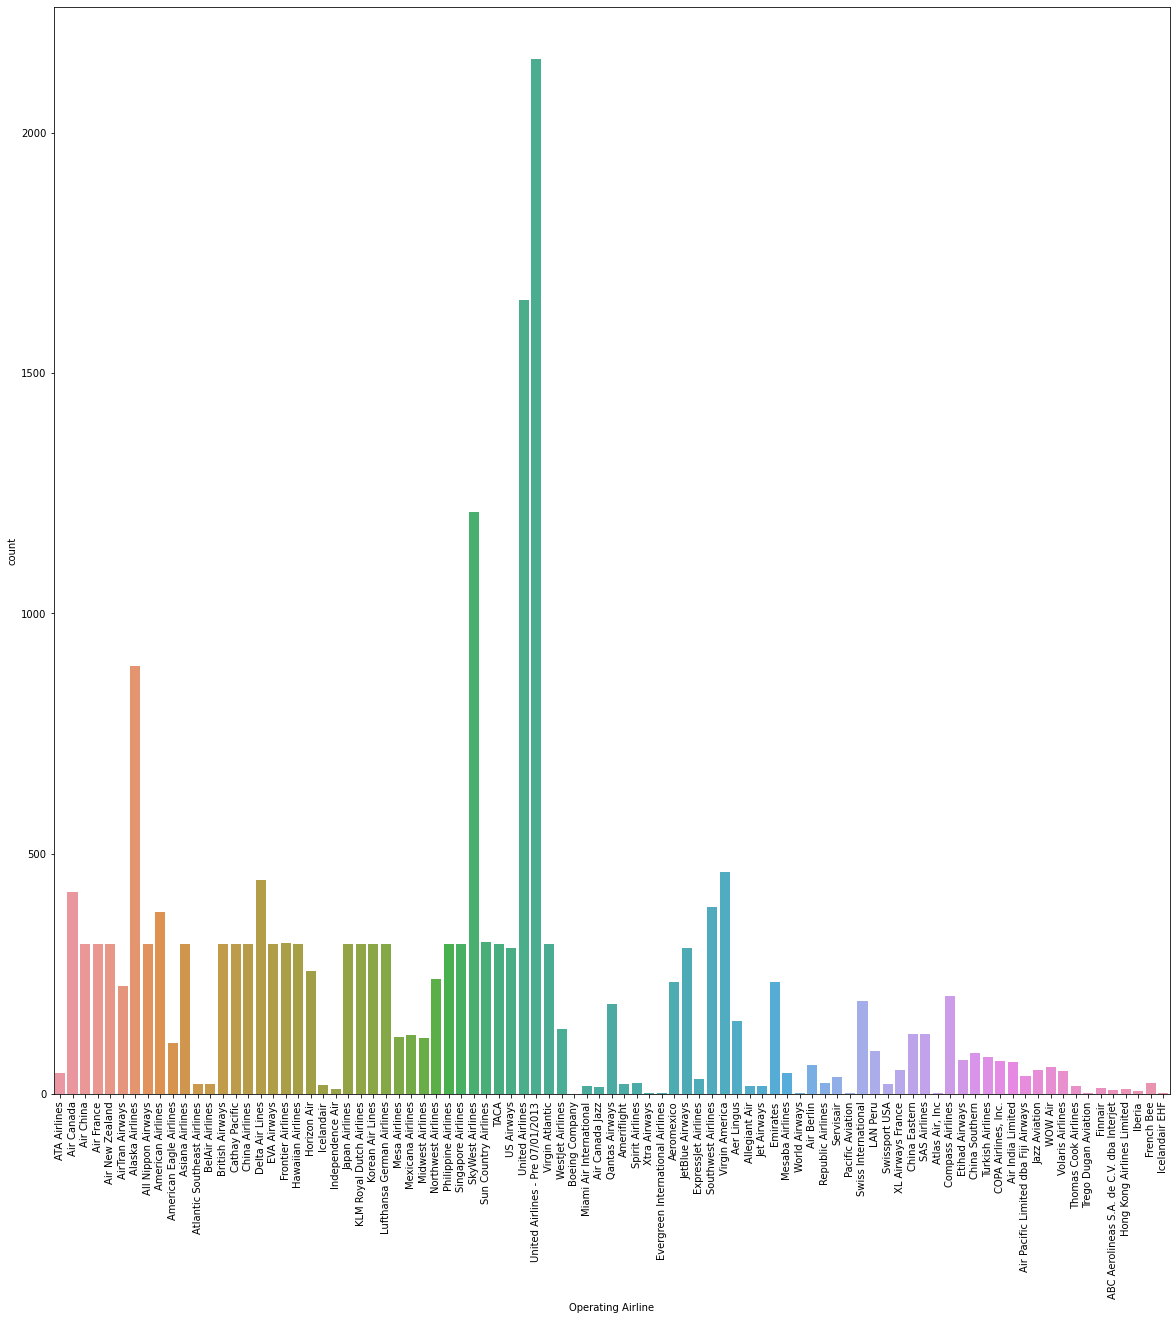

In [6]:
plt.figure(figsize=(20,20))
sns.countplot(df['Operating Airline'])
plt.xticks(rotation=90);

In [7]:
x1=df[['Passenger Count','Operating Airline']]
x1.sample(5)


,Passenger Count,Operating Airline
13121,3956,Mesa Airlines
9608,19019,United Airlines - Pre 07/01/2013
15639,9855,Turkish Airlines
10474,8615,Asiana Airlines
15428,84254,American Airlines


In [8]:
x1=pd.get_dummies(x1,drop_first=True)
model=KMeans(n_clusters=4)
pred=model.fit_predict(x1)

x1['Cluster']=pred
x1.sample(10)

,Passenger Count,Operating Airline_ATA Airlines,Operating Airline_Aer Lingus,Operating Airline_Aeromexico,Operating Airline_Air Berlin,Operating Airline_Air Canada,Operating Airline_Air Canada Jazz,Operating Airline_Air China,Operating Airline_Air France,Operating Airline_Air India Limited,Operating Airline_Air New Zealand,Operating Airline_Air Pacific Limited dba Fiji Airways,Operating Airline_AirTran Airways,Operating Airline_Alaska Airlines,Operating Airline_All Nippon Airways,Operating Airline_Allegiant Air,Operating Airline_American Airlines,Operating Airline_American Eagle Airlines,Operating Airline_Ameriflight,Operating Airline_Asiana Airlines,Operating Airline_Atlantic Southeast Airlines,"Operating Airline_Atlas Air, Inc",Operating Airline_BelAir Airlines,Operating Airline_Boeing Company,Operating Airline_British Airways,"Operating Airline_COPA Airlines, Inc.",Operating Airline_Cathay Pacific,Operating Airline_China Airlines,Operating Airline_China Eastern,Operating Airline_China Southern,Operating Airline_Compass Airlines,Operating Airline_Delta Air Lines,Operating Airline_EVA Airways,Operating Airline_Emirates,Operating Airline_Etihad Airways,Operating Airline_Evergreen International Airlines,Operating Airline_ExpressJet Airlines,Operating Airline_Finnair,Operating Airline_French Bee,Operating Airline_Frontier Airlines,Operating Airline_Hawaiian Airlines,Operating Airline_Hong Kong Airlines Limited,Operating Airline_Horizon Air,Operating Airline_Iberia,Operating Airline_Icelandair,Operating Airline_Icelandair EHF,Operating Airline_Independence Air,Operating Airline_Japan Airlines,Operating Airline_Jazz Aviation,Operating Airline_Jet Airways,Operating Airline_JetBlue Airways,Operating Airline_KLM Royal Dutch Airlines,Operating Airline_Korean Air Lines,Operating Airline_LAN Peru,Operating Airline_Lufthansa German Airlines,Operating Airline_Mesa Airlines,Operating Airline_Mesaba Airlines,Operating Airline_Mexicana Airlines,Operating Airline_Miami Air International,Operating Airline_Midwest Airlines,Operating Airline_Northwest Airlines,Operating Airline_Pacific Aviation,Operating Airline_Philippine Airlines,Operating Airline_Qantas Airways,Operating Airline_Republic Airlines,Operating Airline_SAS Airlines,Operating Airline_Servisair,Operating Airline_Singapore Airlines,Operating Airline_SkyWest Airlines,Operating Airline_Southwest Airlines,Operating Airline_Spirit Airlines,Operating Airline_Sun Country Airlines,Operating Airline_Swiss International,Operating Airline_Swissport USA,Operating Airline_TACA,Operating Airline_Thomas Cook Airlines,Operating Airline_Trego Dugan Aviation,Operating Airline_Turkish Airlines,Operating Airline_US Airways,Operating Airline_United Airlines,Operating Airline_United Airlines - Pre 07/01/2013,Operating Airline_Virgin America,Operating Airline_Virgin Atlantic,Operating Airline_Volaris Airlines,Operating Airline_WOW Air,Operating Airline_WestJet Airlines,Operating Airline_World Airways,Operating Airline_XL Airways France,Operating Airline_Xtra Airways,Cluster
2987,16406,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
8416,9330,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6771,11197,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
893,23581,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
18600,377,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10698,8

In [9]:
silhouette_score(x1,pred)

0.7861526635033455

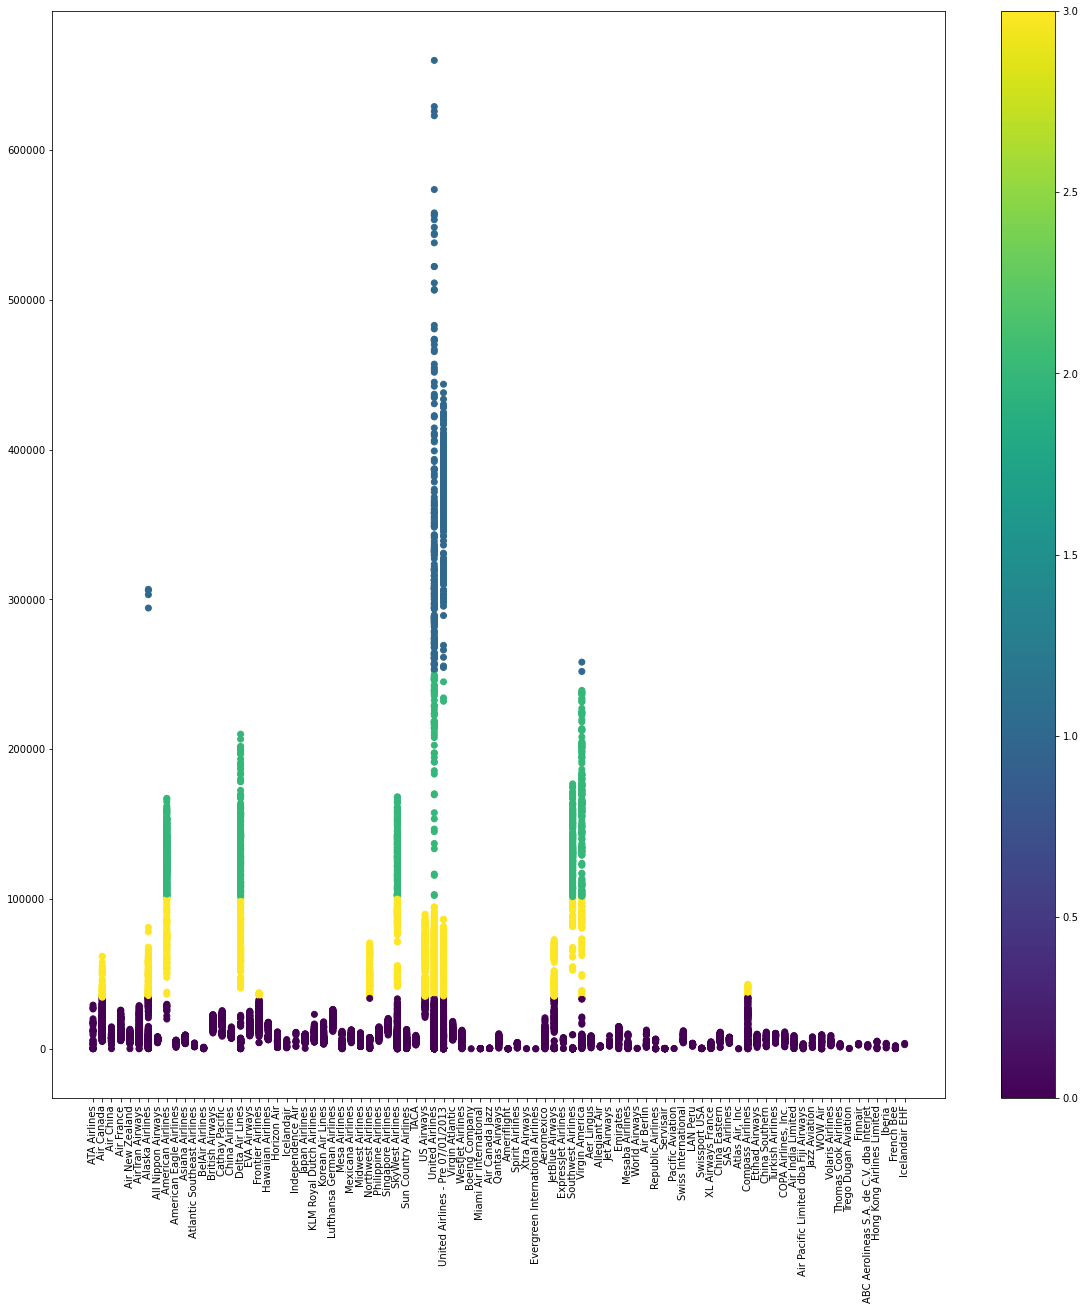

In [10]:
plt.figure(figsize=(20,20))
plt.scatter(x=df['Operating Airline'],y=df['Passenger Count'],c=pred)
plt.xticks(rotation=90)
plt.colorbar()
plt.show();

Number of cluster: 2 , Score: 0.8596461993629329
Number of cluster: 3 , Score: 0.8285981424947965
Number of cluster: 4 , Score: 0.7861526635033455
Number of cluster: 5 , Score: 0.7846348290096645
Number of cluster: 6 , Score: 0.6614461012757495
Number of cluster: 7 , Score: 0.6620849261651092
Number of cluster: 8 , Score: 0.6435182285112522
Number of cluster: 9 , Score: 0.6406571773435925
Number of cluster: 10 , Score: 0.614227890973215


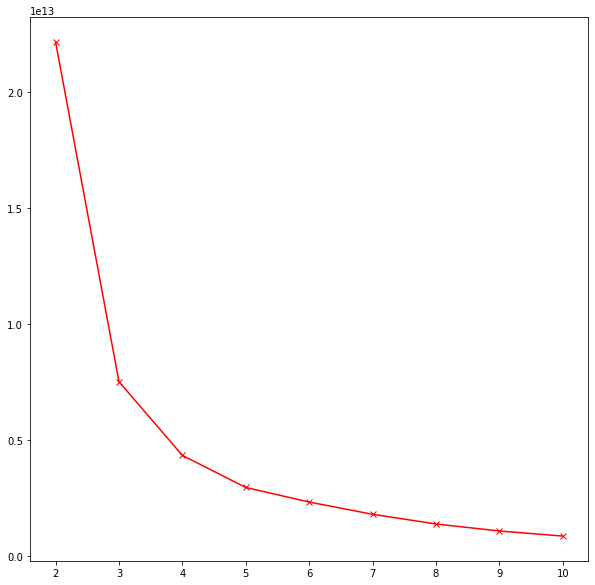

In [11]:
cluster(x1,10)

In [12]:
x2=df[['Activity Period','Operating Airline']]
x2=pd.get_dummies(x2,drop_first=True)
model2=KMeans(n_clusters=4)
pred2=model.fit_predict(x2)


In [13]:
silhouette_score(x2,pred2)

0.6054138401962709

In [14]:
x2['Cluster']=pred2
x2.sample(20)

,Activity Period,Operating Airline_ATA Airlines,Operating Airline_Aer Lingus,Operating Airline_Aeromexico,Operating Airline_Air Berlin,Operating Airline_Air Canada,Operating Airline_Air Canada Jazz,Operating Airline_Air China,Operating Airline_Air France,Operating Airline_Air India Limited,Operating Airline_Air New Zealand,Operating Airline_Air Pacific Limited dba Fiji Airways,Operating Airline_AirTran Airways,Operating Airline_Alaska Airlines,Operating Airline_All Nippon Airways,Operating Airline_Allegiant Air,Operating Airline_American Airlines,Operating Airline_American Eagle Airlines,Operating Airline_Ameriflight,Operating Airline_Asiana Airlines,Operating Airline_Atlantic Southeast Airlines,"Operating Airline_Atlas Air, Inc",Operating Airline_BelAir Airlines,Operating Airline_Boeing Company,Operating Airline_British Airways,"Operating Airline_COPA Airlines, Inc.",Operating Airline_Cathay Pacific,Operating Airline_China Airlines,Operating Airline_China Eastern,Operating Airline_China Southern,Operating Airline_Compass Airlines,Operating Airline_Delta Air Lines,Operating Airline_EVA Airways,Operating Airline_Emirates,Operating Airline_Etihad Airways,Operating Airline_Evergreen International Airlines,Operating Airline_ExpressJet Airlines,Operating Airline_Finnair,Operating Airline_French Bee,Operating Airline_Frontier Airlines,Operating Airline_Hawaiian Airlines,Operating Airline_Hong Kong Airlines Limited,Operating Airline_Horizon Air,Operating Airline_Iberia,Operating Airline_Icelandair,Operating Airline_Icelandair EHF,Operating Airline_Independence Air,Operating Airline_Japan Airlines,Operating Airline_Jazz Aviation,Operating Airline_Jet Airways,Operating Airline_JetBlue Airways,Operating Airline_KLM Royal Dutch Airlines,Operating Airline_Korean Air Lines,Operating Airline_LAN Peru,Operating Airline_Lufthansa German Airlines,Operating Airline_Mesa Airlines,Operating Airline_Mesaba Airlines,Operating Airline_Mexicana Airlines,Operating Airline_Miami Air International,Operating Airline_Midwest Airlines,Operating Airline_Northwest Airlines,Operating Airline_Pacific Aviation,Operating Airline_Philippine Airlines,Operating Airline_Qantas Airways,Operating Airline_Republic Airlines,Operating Airline_SAS Airlines,Operating Airline_Servisair,Operating Airline_Singapore Airlines,Operating Airline_SkyWest Airlines,Operating Airline_Southwest Airlines,Operating Airline_Spirit Airlines,Operating Airline_Sun Country Airlines,Operating Airline_Swiss International,Operating Airline_Swissport USA,Operating Airline_TACA,Operating Airline_Thomas Cook Airlines,Operating Airline_Trego Dugan Aviation,Operating Airline_Turkish Airlines,Operating Airline_US Airways,Operating Airline_United Airlines,Operating Airline_United Airlines - Pre 07/01/2013,Operating Airline_Virgin America,Operating Airline_Virgin Atlantic,Operating Airline_Volaris Airlines,Operating Airline_WOW Air,Operating Airline_WestJet Airlines,Operating Airline_World Airways,Operating Airline_XL Airways France,Operating Airline_Xtra Airways,Cluster
14466,201511,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
17610,201710,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
7009,201007,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
6435,201002,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
5509,200906,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

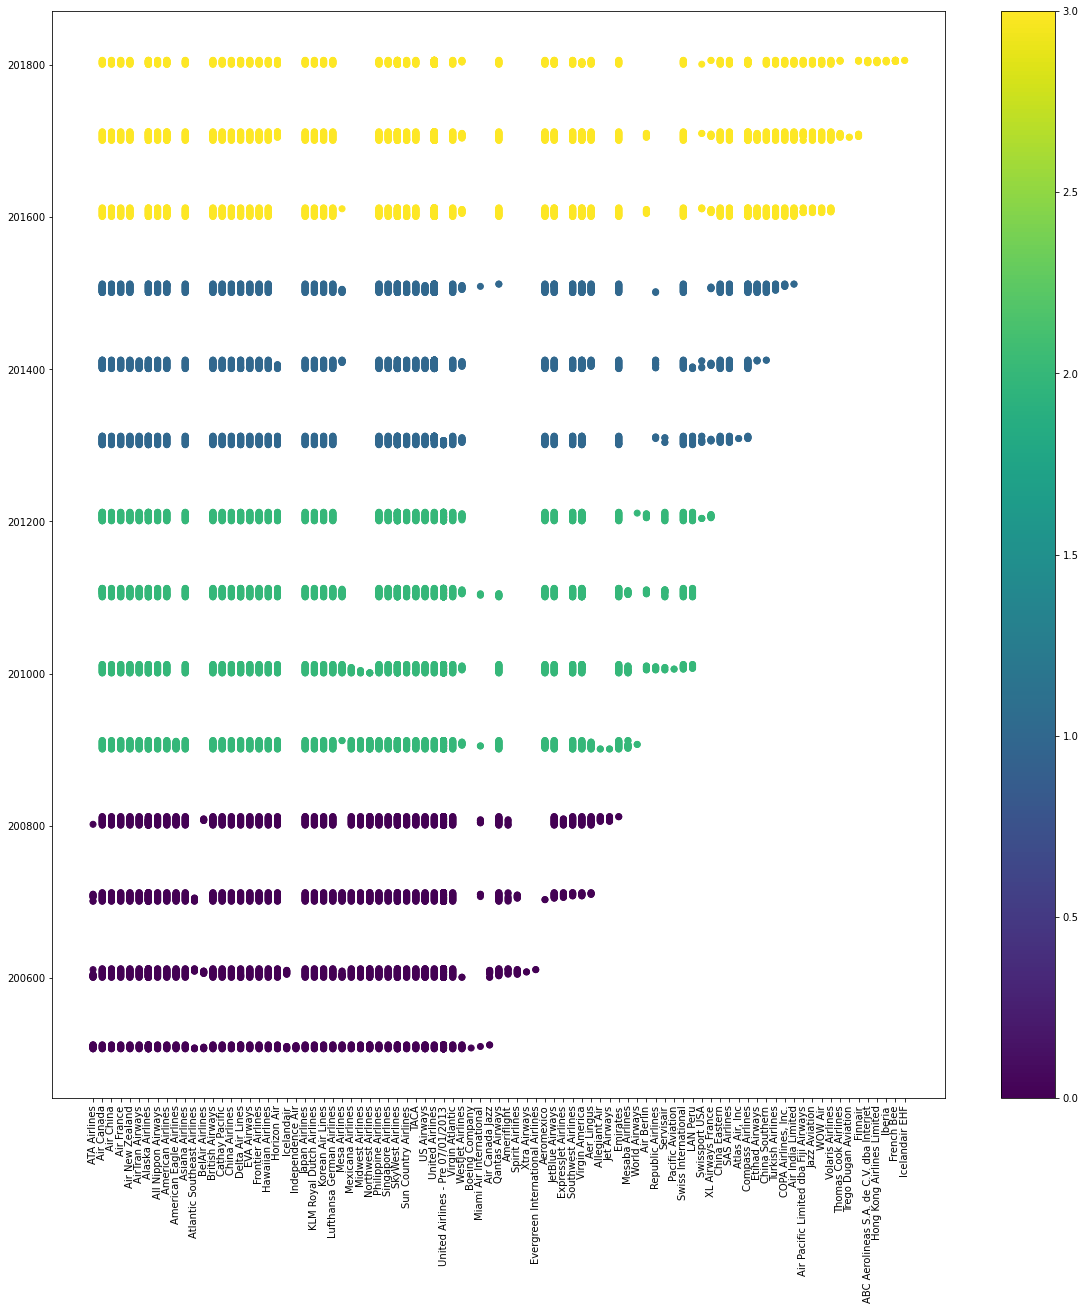

In [15]:
plt.figure(figsize=(20,20))
plt.scatter(x=df['Operating Airline'],y=df['Activity Period'],c=pred2)
plt.colorbar()
plt.xticks(rotation=90)
plt.show();

Number of cluster: 2 , Score: 0.6402133722848478
Number of cluster: 3 , Score: 0.6116874484617092
Number of cluster: 4 , Score: 0.6110490821303752
Number of cluster: 5 , Score: 0.6123244535557655
Number of cluster: 6 , Score: 0.6456157058654145
Number of cluster: 7 , Score: 0.66974324757166
Number of cluster: 8 , Score: 0.6755415146570344
Number of cluster: 9 , Score: 0.7208353492202166
Number of cluster: 10 , Score: 0.741071004415029


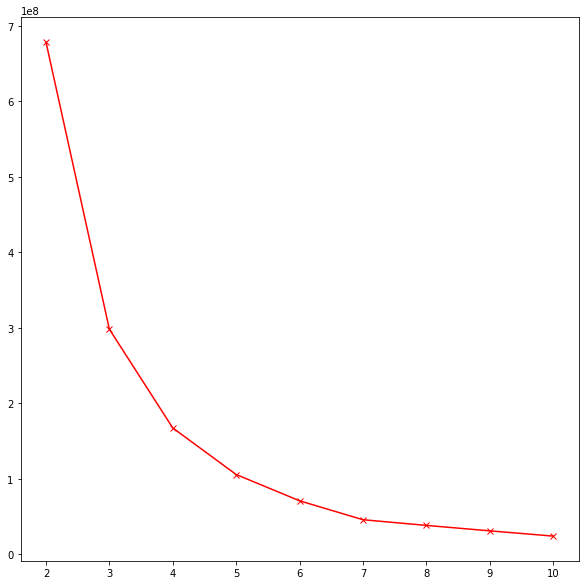

In [16]:
cluster(x2,10)

In [17]:
x3=df[['Passenger Count','GEO Region']]
x3=pd.get_dummies(x3,drop_first=True)

model3=KMeans(n_clusters=4)
pred3=model.fit_predict(x3)
silhouette_score(x3,pred3)


0.7861217010962213

In [18]:
x3['Cluster']=pred3
x3.sample(10)

,Passenger Count,GEO Region_Australia / Oceania,GEO Region_Canada,GEO Region_Central America,GEO Region_Europe,GEO Region_Mexico,GEO Region_Middle East,GEO Region_South America,GEO Region_US,Cluster
3353,7894,0,0,0,1,0,0,0,0,2
12991,43244,0,0,0,0,0,0,0,1,0
3319,4751,0,0,0,0,0,0,0,1,2
3958,41339,0,0,0,0,0,0,0,1,0
14181,26046,0,0,0,0,0,0,0,1,2
7821,16737,0,0,0,0,0,0,0,0,2
3741,17458,0,0,0,1,0,0,0,0,2
10547,16282,0,0,0,1,0,0,0,0,2
4468,321,0,0,0,1,0,0,0,0,2
16073,680,0,1,0,0,0,0,0,0,2


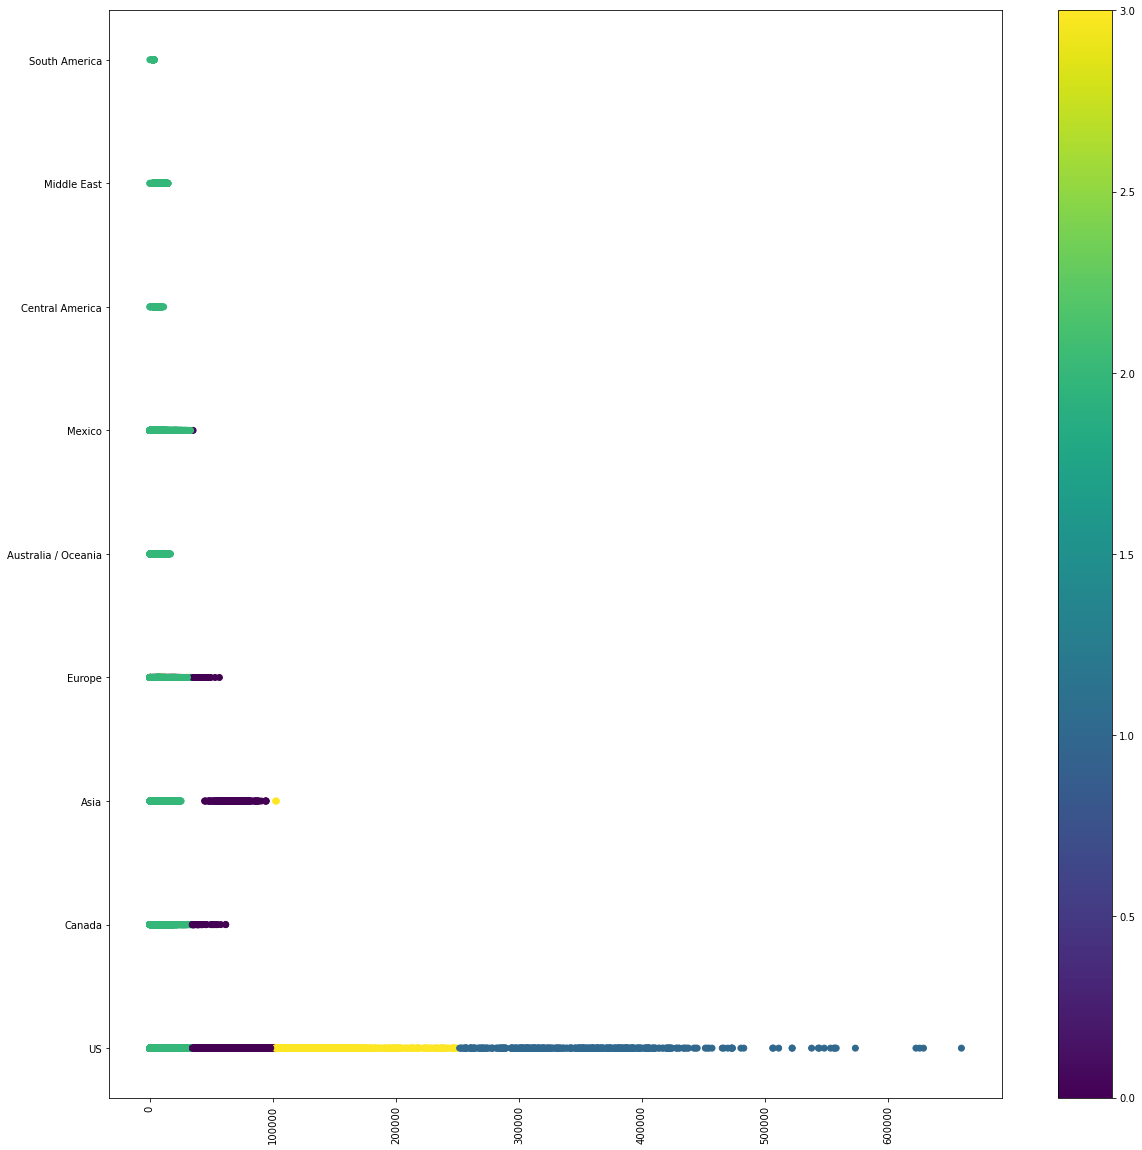

In [19]:
plt.figure(figsize=(20,20))
plt.scatter(x=df['Passenger Count'],y=df['GEO Region'],c=pred3)
plt.colorbar()
plt.xticks(rotation=90)
plt.show();

Number of cluster: 2 , Score: 0.8596462007903708
Number of cluster: 3 , Score: 0.8286421853046119
Number of cluster: 4 , Score: 0.7864088769733256
Number of cluster: 5 , Score: 0.7844924959709945
Number of cluster: 6 , Score: 0.6611111771208917
Number of cluster: 7 , Score: 0.6593023252894206
Number of cluster: 8 , Score: 0.6472543339814154
Number of cluster: 9 , Score: 0.6399461012290987
Number of cluster: 10 , Score: 0.6119154222261698


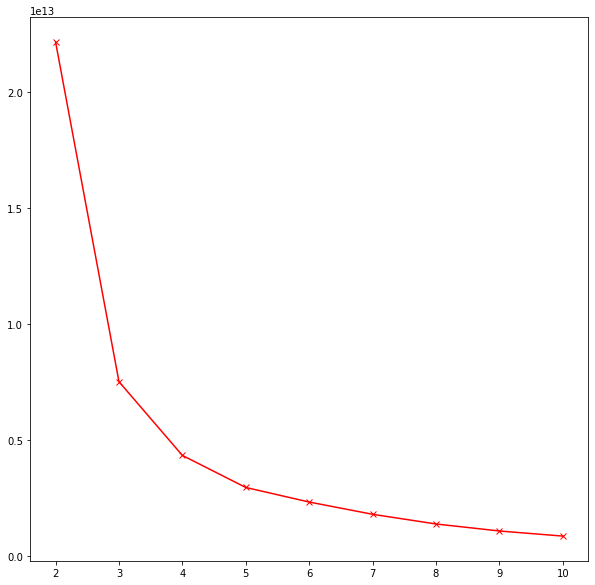

In [20]:
cluster(x3,10)